In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df_gdp = pd.read_csv('./data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258.csv')
df_gdp.drop(columns=df_gdp.columns[-1], axis=1, inplace=True)

In [3]:
all_years = [str(x) for x in range(1960, 2023)]

In [15]:
df_gdp.dropna(subset=all_years, how='all', inplace=True)
print(len(df_gdp))


262


In [14]:
allcountries = df_gdp[all_years]
list_all_countries = allcountries.values.tolist()

In [15]:
temp1 = df_gdp[df_gdp['Country Name'].str.contains('Iran')]
temp1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
112,"Iran, Islamic Rep.",IRN,GDP (current US$),NY.GDP.MKTP.CD,4.199134e+09,4.426949e+09,4.693566e+09,4.928628e+09,5.379846e+09,6.197320e+09,...,4.927756e+11,4.603828e+11,4.082129e+11,4.579546e+11,4.866301e+11,3.296919e+11,2.836495e+11,2.397355e+11,3.590969e+11,4.134932e+11


In [16]:
temp1 = df_gdp[df_gdp['Country Name'].str.contains('Iran')]
temp1.columns[temp1.isna().any()]

Index(['1991', '1992'], dtype='object')

In [17]:
list_iran_gdp = temp1[all_years].values.tolist()[0].copy()

In [18]:
list_iran_gdp[:10]

[4199134389.9037,
 4426949094.8403,
 4693566416.48346,
 4928628018.38759,
 5379845647.70139,
 6197319929.04038,
 6789938671.75094,
 7555383690.16,
 8623172959.89803,
 9743089607.49587]

In [19]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10, weights="uniform")
X = list_all_countries
x_filled = imputer.fit_transform(X)
x_filled[112]
# imp.fit(list_iran_gdp[:10])


array([4.19913439e+09, 4.42694909e+09, 4.69356642e+09, 4.92862802e+09,
       5.37984565e+09, 6.19731993e+09, 6.78993867e+09, 7.55538369e+09,
       8.62317296e+09, 9.74308961e+09, 1.09762452e+10, 1.37318028e+10,
       1.71534633e+10, 2.70816982e+10, 4.62090921e+10, 5.17762223e+10,
       6.80552951e+10, 8.06001227e+10, 7.79943166e+10, 9.03918773e+10,
       9.43622756e+10, 1.00499313e+11, 1.25948756e+11, 1.56365157e+11,
       1.62276729e+11, 1.80183630e+11, 2.09094562e+11, 1.34009996e+11,
       1.23057861e+11, 1.20496363e+11, 1.24813264e+11, 1.07640011e+11,
       1.11479914e+11, 6.37436232e+10, 7.18414612e+10, 9.64192257e+10,
       1.20403932e+11, 1.13919163e+11, 1.10276913e+11, 1.13848450e+11,
       1.09591708e+11, 1.26878750e+11, 1.28626918e+11, 1.53544751e+11,
       1.90043434e+11, 2.26452138e+11, 2.66298912e+11, 3.49881601e+11,
       4.12336172e+11, 4.16397026e+11, 4.86807617e+11, 6.26133112e+11,
       6.44035512e+11, 4.92775566e+11, 4.60382791e+11, 4.08212918e+11,
      

In [21]:
df_filled = pd.DataFrame(x_filled, columns=[all_years])
df_first_cols = df_gdp.drop(all_years, inplace=True, axis=1)
pd.concat(df_first_cols, df_filled, axis=1)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_19028\114653137.py", line 2, in <module>
    df_first_cols = df_gdp.drop(all_years, inplace=True, axis=1)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\frame.py", line 5258, in drop
    return super().drop(
           ^^^^^^^^^^^^^
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 4549, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 4591, in _d

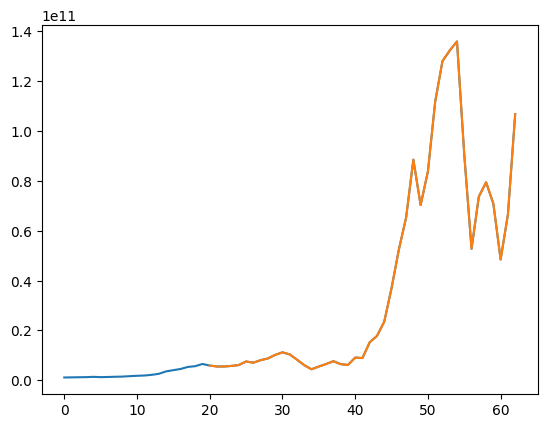

In [ ]:
plt.plot(x_filled[4])
plt.plot(X[4])
plt.show()
